## Springboard Data Science Career Track - Capstone 2

#### John Peterson

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import scipy.stats as stats

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### Data Wrangling and EDA

In [3]:
print("Train Shape : ", train_df.shape)
print("Test Shape : ", test_df.shape)

Train Shape :  (4459, 4993)
Test Shape :  (49342, 4992)


In [4]:
print(train_df.head())

          ID      target  48df886f9  0deb4b6a8  34b15f335  a8cb14b00  \
0  000d6aaf2  38000000.0        0.0          0        0.0          0   
1  000fbd867    600000.0        0.0          0        0.0          0   
2  0027d6b71  10000000.0        0.0          0        0.0          0   
3  0028cbf45   2000000.0        0.0          0        0.0          0   
4  002a68644  14400000.0        0.0          0        0.0          0   

   2f0771a37  30347e683  d08d1fbe3  6ee66e115    ...      3ecc09859  \
0          0          0          0          0    ...            0.0   
1          0          0          0          0    ...            0.0   
2          0          0          0          0    ...            0.0   
3          0          0          0          0    ...            0.0   
4          0          0          0          0    ...            0.0   

   9281abeea  8675bec0b  3a13ed79a  f677d4d13  71b203550  137efaa80  \
0        0.0        0.0          0          0          0          0  

In [6]:
train_df.describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


**Initial Observations**

1. Test set is very large, roughly 10 times larger than train set
2. Train set number of columns is more than the number of rows
3. Lots of zero values in the data
4. Column names are anonymized

##### Target Variable

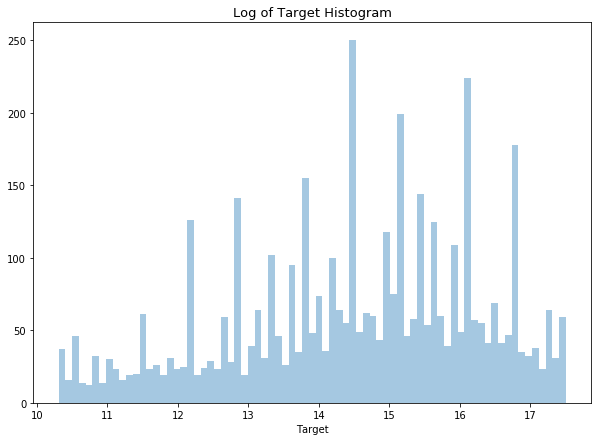

In [11]:
# plot log of target 
plt.figure(figsize=(10,7))
sns.distplot(np.log1p(train_df['target'].values), bins=75, kde=False)
plt.xlabel('Target')
plt.title('Log of Target Histogram', fontsize=13)
plt.show()

##### Missing Values

In [24]:
# missing values check
missing = train_df.isnull().sum(axis=0).reset_index()
missing.columns = ['column_name', 'missing_total']
missing = missing[missing['missing_total']>0]
missing = missing.sort_values(by='missing_total')
missing

,column_name,missing_total


##### Columns with constant values

In [16]:
unique_df = train_df.nunique().reset_index()
unique_df.head(20)

,index,0
0,ID,4459
1,target,1413
2,48df886f9,32
3,0deb4b6a8,5
4,34b15f335,29
5,a8cb14b00,3
6,2f0771a37,6
7,30347e683,25
8,d08d1fbe3,6
9,6ee66e115,6


In [18]:
unique_df.columns = ['col_name', 'unique_count']
constant_col_df = unique_df[unique_df['unique_count']==1]
constant_col_df.shape

(256, 2)

To determine the columns with only zero data the unique numbers in each column were counted. Columns with 1 unique number are zero and those will be removed. 256 columns were identifed with constant values. A check below is looking at the sum of the columns.

In [19]:
constant_col_df.head()

,col_name,unique_count
28,d5308d8bc,1
35,c330f1a67,1
38,eeac16933,1
59,7df8788e8,1
70,5b91580ee,1


In [25]:
print("Column: d5308d8bc, with unique count 1 =", train_df['d5308d8bc'].sum())
print("Column: 5b91580ee, with unique count 1 =", train_df['5b91580ee'].sum())
print("Column: d08d1fbe3, with unique count 6 =", train_df['d08d1fbe3'].sum())

Column: d5308d8bc, with unique count 1 = 0
Column: 5b91580ee, with unique count 1 = 0
Column: d08d1fbe3, with unique count 6 = 75202000


##### Correlation of features with Target